In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("..\data\external\predicciones.csv")
df.head()

,Unnamed: 0,Fecha,Temperatura Minima,Temperatura promedio
0,0,2024-07-03,0,17
1,1,2024-07-04,0,17
2,2,2024-07-05,1,17
3,3,2024-07-06,2,17
4,4,2024-07-07,2,17


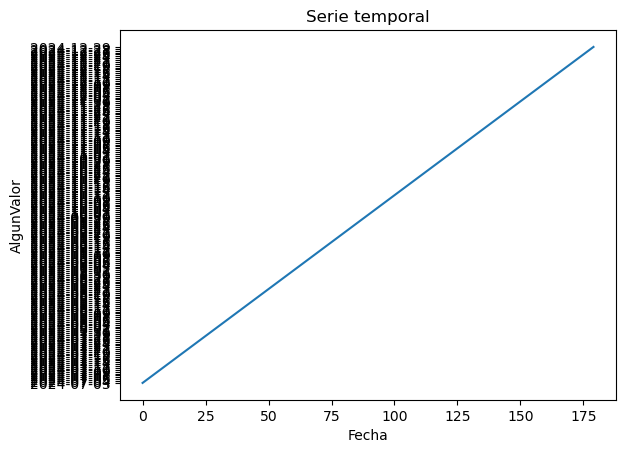

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['Fecha'])
plt.xlabel('Fecha')
plt.ylabel('AlgunValor')
plt.title('Serie temporal')
plt.show()


# FUNCION PARA OBTENER ESTACION


In [6]:
def get_season(date):
    if date >= pd.Timestamp(year=date.year, month=12, day=21) or date <= pd.Timestamp(year=date.year, month=3, day=20):
        return 'summer'
    elif date >= pd.Timestamp(year=date.year, month=3, day=21) and date <= pd.Timestamp(year=date.year, month=6, day=20):
        return 'autumn'
    elif date >= pd.Timestamp(year=date.year, month=6, day=21) and date <= pd.Timestamp(year=date.year, month=9, day=20):
        return 'winter'
    elif date >= pd.Timestamp(year=date.year, month=9, day=21) and date <= pd.Timestamp(year=date.year, month=12, day=20):
        return 'spring'

# FUNCION PARA OBTENER CICLO FENOLOGICO

In [7]:
def get_phenology_cycle(date):
    month = date.month
    if month in [6, 7, 8]:
        return 'Reposo invernal'
    elif month == 9:
        return 'Brotacion'
    elif month in [10, 11]:
        return 'Floracion'
    elif month in [11, 12]:
        return 'Cuajado'
    elif month in [1, 2]:
        return 'Envero'
    elif month in [2, 3, 4]:
        return 'Cosecha'
    else:
        return 'Fuera del ciclo tipico'

# APLICACION DE LAS FUNCIONES


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            180 non-null    int64 
 1   Fecha                 180 non-null    object
 2   Temperatura Minima    180 non-null    int64 
 3   Temperatura promedio  180 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


## ESTACION

In [9]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [10]:
df['Estacion'] = df['Fecha'].apply(get_season)
df.Estacion.unique()

array(['winter', 'spring', 'summer'], dtype=object)

## CICLO FENOLOGICO

In [11]:
df['Ciclo Fenologico'] = df['Fecha'].apply(get_phenology_cycle)
df['Ciclo Fenologico'].unique()

array(['Reposo invernal', 'Brotacion', 'Floracion', 'Cuajado'],
      dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            180 non-null    int64         
 1   Fecha                 180 non-null    datetime64[ns]
 2   Temperatura Minima    180 non-null    int64         
 3   Temperatura promedio  180 non-null    int64         
 4   Estacion              180 non-null    object        
 5   Ciclo Fenologico      180 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 8.6+ KB


In [13]:
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 180 non-null    datetime64[ns]
 1   Temperatura Minima    180 non-null    int64         
 2   Temperatura promedio  180 non-null    int64         
 3   Estacion              180 non-null    object        
 4   Ciclo Fenologico      180 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.2+ KB


In [14]:
df.head()

,Fecha,Temperatura Minima,Temperatura promedio,Estacion,Ciclo Fenologico
0,2024-07-03,0,17,winter,Reposo invernal
1,2024-07-04,0,17,winter,Reposo invernal
2,2024-07-05,1,17,winter,Reposo invernal
3,2024-07-06,2,17,winter,Reposo invernal
4,2024-07-07,2,17,winter,Reposo invernal


In [15]:
df['Temperatura Maxima'] = 2 * df['Temperatura promedio'] - df['Temperatura Minima']
df = df[['Fecha', 'Estacion', 'Ciclo Fenologico', 'Temperatura Minima', 'Temperatura promedio', 'Temperatura Maxima']]
df.head()

,Fecha,Estacion,Ciclo Fenologico,Temperatura Minima,Temperatura promedio,Temperatura Maxima
0,2024-07-03,winter,Reposo invernal,0,17,34
1,2024-07-04,winter,Reposo invernal,0,17,34
2,2024-07-05,winter,Reposo invernal,1,17,33
3,2024-07-06,winter,Reposo invernal,2,17,32
4,2024-07-07,winter,Reposo invernal,2,17,32


In [17]:
df.to_csv("..\data\external\predicciones_Estacion_Ciclo.csv", index=False)